In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import catboost
import shap
input_file = 'Ti.xlsx'
df = pd.read_excel(input_file)

In [2]:
def RDkit_descriptors(smiles, suffix=""):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    if suffix:
        desc_names = [name + suffix for name in desc_names]
    Mol_descriptors = []
    for mol in mols:
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names    

In [3]:
Mol_descriptors_HBA,desc_names = RDkit_descriptors(df['SMILES'])
df_target = pd.DataFrame(Mol_descriptors_HBA,columns=desc_names)

[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerator
[12:11:26] DEPRECATION WARNING: please use MorganGenerat

In [4]:
Mol_descriptors, desc_names_sol = RDkit_descriptors(df['SM_Sol'], suffix="_sol")
df_solvent = pd.DataFrame(Mol_descriptors, columns=desc_names_sol)

[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerator
[12:11:39] DEPRECATION WARNING: please use MorganGenerat

In [5]:
df_all = pd.concat([df_target, df_solvent, df['T']], axis=1)
df_all

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd_sol,fr_sulfone_sol,fr_term_acetylene_sol,fr_tetrazole_sol,fr_thiazole_sol,fr_thiocyan_sol,fr_thiophene_sol,fr_unbrch_alkane_sol,fr_urea_sol,T
0,10.271991,10.271991,0.510417,-8.451389,0.228260,45.318182,695.555,655.235,695.135608,231,...,0,0,0,0,0,0,0,0,0,296.15
1,10.271991,10.271991,0.510417,-7.361111,0.229626,40.850000,631.519,595.231,631.131895,207,...,0,0,0,0,0,0,0,0,0,296.15
2,11.409336,11.409336,0.361111,-6.790123,0.423478,42.347826,351.225,330.057,351.092810,118,...,0,0,0,0,0,0,0,0,0,296.15
3,16.995370,16.995370,0.634259,-7.500000,0.420733,116.769231,205.973,205.973,205.944753,58,...,0,0,0,0,0,0,0,0,0,298.15
4,7.813272,7.813272,1.498457,-5.555556,0.449922,116.769231,238.883,238.883,237.885652,58,...,0,0,0,0,0,0,0,0,0,298.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,7.259160,7.259160,0.598425,-6.448583,0.326661,16.810811,528.431,500.207,528.149562,180,...,0,0,0,0,0,0,0,0,0,298.15
94,14.113594,14.113594,0.171430,-8.325144,0.105492,16.105263,858.543,824.271,858.177351,302,...,0,0,0,0,0,0,0,0,0,298.15
95,11.392439,11.392439,0.117349,-6.865249,0.179037,16.097561,590.371,568.195,590.088418,200,...,0,0,0,0,0,0,0,0,0,298.15
96,14.493140,14.493140,0.151727,-6.798333,0.189971,16.000000,621.290,597.098,620.052774,200,...,0,0,0,0,0,0,0,0,0,298.15


R2 = 0.779 ± 0.08
RMSE = 240.433 ± 63.566
MAE = 164.011 ± 40.269


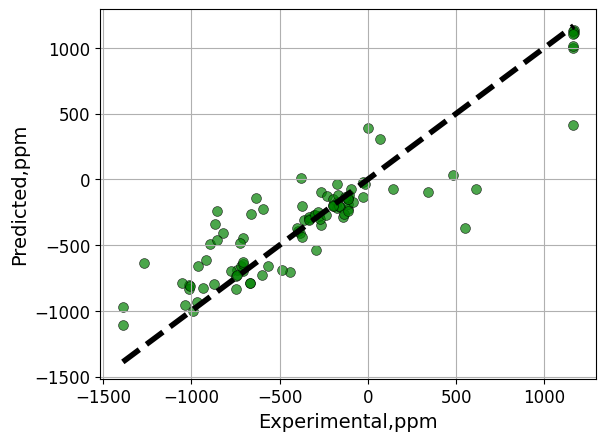

In [14]:
columns_to_drop = ['SMILES', 'SM_Sol']
X = df_all.values
Y = df['SH'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

Y_pred, Y_true = [], []
r2_scores, rmse_scores, mae_scores = [], [], []

for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = catboost.CatBoostRegressor(silent=True, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Y_pred.extend(y_pred)
    Y_true.extend(y_test)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

print('R2 = {} ± {}'.format(round(np.mean(r2_scores), 3), round(np.std(r2_scores), 3)))
print('RMSE = {} ± {}'.format(round(np.mean(rmse_scores), 3), round(np.std(rmse_scores), 3)))
print('MAE = {} ± {}'.format(round(np.mean(mae_scores), 3), round(np.std(mae_scores), 3)))

fig, ax = plt.subplots()
ax.scatter(
    Y_true, Y_pred,
    color='green',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.7,
    s=50
)
ax.tick_params(axis='both', labelsize=12)
ax.plot([min(Y_true), max(Y_true)], [min(Y_true), max(Y_true)], "k--", lw=4)
ax.grid(True)
ax.set_xlabel("Experimental,ppm", fontsize=14)
ax.set_ylabel("Predicted,ppm",  fontsize=14)
plt.savefig('Ti.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

RMSE: 296.7239
RMSE: 263.1124
RMSE: 189.0446
RMSE: 144.4881
RMSE: 308.7971


<Figure size 640x480 with 0 Axes>

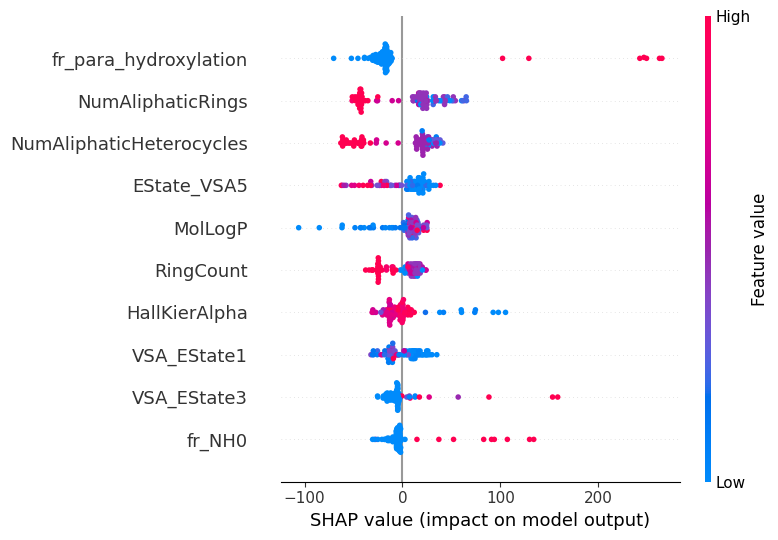

In [8]:
X = df_all
Y = df['SH']

CV = KFold(n_splits=5, shuffle=True, random_state=42)
ix_training, ix_test = [], []

for train_index, test_index in CV.split(X):
    ix_training.append(train_index)
    ix_test.append(test_index)

SHAP_values_per_fold = []


for i, (train_outer_ix, test_outer_ix) in enumerate(zip(ix_training, ix_test)):

    X_train, X_test = X.iloc[train_outer_ix, :], X.iloc[test_outer_ix, :]
    Y_train, Y_test = Y.iloc[train_outer_ix], Y.iloc[test_outer_ix]

    model = catboost.CatBoostRegressor(silent=True, random_seed=42)
    fit = model.fit(X_train, Y_train)
    yhat = fit.predict(X_test)
    result = mean_squared_error(Y_test, yhat)
    print('RMSE:', round(np.sqrt(result), 4))

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    SHAP_values_per_fold.extend(shap_values)
new_index = [ix for ix_test_fold in ix_test for ix in ix_test_fold]
import matplotlib.pyplot as plt
import numpy as np

plt.set_cmap("plasma")

shap_fig = plt.figure()
shap.summary_plot(np.array(SHAP_values_per_fold), X.reindex(new_index), max_display=10)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel("SHAP value (impact on model output)", fontsize=14)
shap_fig.savefig('Shap_Zr.jpeg', dpi=300, bbox_inches='tight')
plt.close(shap_fig)

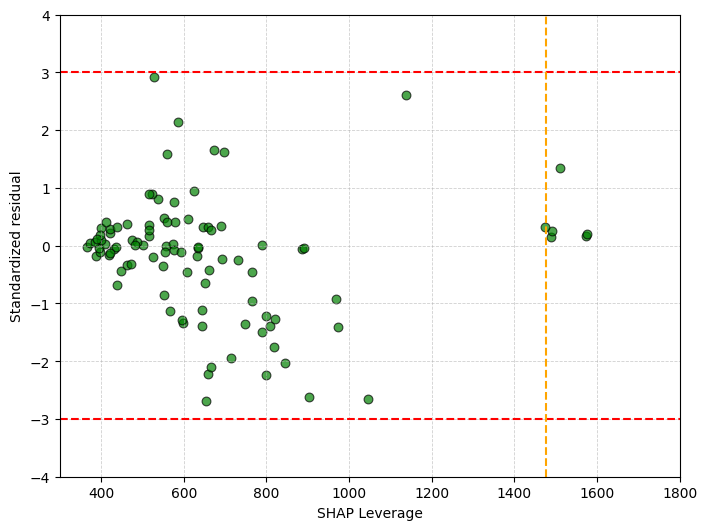

In [13]:
X = df_all.values
y = df['SH'].values

all_leverages = np.zeros(len(X))
all_residuals = np.zeros(len(X))

CV = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(CV.split(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = catboost.CatBoostRegressor(verbose=0)
    model.fit(X_train, y_train)
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap_matrix = np.abs(shap_values)
    leverage_shap = shap_matrix.sum(axis=1) 

    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    std_residuals = residuals / np.std(residuals)

    all_leverages[test_idx] = leverage_shap
    all_residuals[test_idx] = std_residuals

h_star = np.percentile(all_leverages, 95)
out_of_leverage = np.sum(all_leverages > h_star)
out_of_residuals = np.sum((all_residuals < -3) | (all_residuals > 3))

plt.figure(figsize=(8, 6))
plt.scatter(
    all_leverages, 
    all_residuals, 
    c='green',        
    edgecolor='black',  
    linewidth=0.8,      
    alpha=0.7,        
    s=40,               
    label=''
)
plt.axhline(y=3, color='red', linestyle='--', label='')
plt.axhline(y=-3, color='red', linestyle='--')
plt.axvline(x=h_star, color='orange', linestyle='--', label=f'Leverage threshold (95% percentile) h* = {h_star:.3f}')
plt.xlabel('SHAP Leverage')
plt.ylabel('Standardized residual')
plt.title("")
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.xlim(300, 1800)
plt.ylim(-4, 4)
plt.savefig('Williams_plot_Zr.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()